In [3]:
# importar as libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

#lib para ignorar avisos
import warnings

#desabilitando avisos
warnings.filterwarnings('ignore')


In [5]:
dados = pd.read_excel('acao_magalu.xlsx')
dados.head()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
0,2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
1,2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2,2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
3,2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
4,2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


In [6]:
#verificar a dimensão
dados.shape

(247, 7)

In [7]:
# Método para encontrar as estatísticas de uma moldura de dados
dados.describe()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
count,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000
mean,18.977530,18.205668,18.629717,18.549555,4.536056e+07,18.541389
std,5.632712,5.567061,5.602659,5.637050,4.082594e+07,5.631316
min,6.200000,5.620000,5.710000,5.740000,8.716100e+06,5.740000
25%,15.010000,14.275000,14.705000,14.555000,2.285200e+07,14.555000
50%,20.650000,19.930000,20.280001,20.270000,3.130900e+07,20.255312
75%,22.595000,21.985001,22.375000,22.200001,4.742785e+07,22.183912
max,27.070000,25.900000,26.250000,26.240000,2.578313e+08,26.220984


In [8]:
# verificar campos nulos e tipo dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        247 non-null    datetime64[ns]
 1   Maior       247 non-null    float64       
 2   Menor       247 non-null    float64       
 3   Abertura    247 non-null    float64       
 4   Fechamento  247 non-null    float64       
 5   Volume      247 non-null    int64         
 6   Adj Close   247 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.6 KB


In [9]:
# Verificar campos nulos
dados.isnull().sum()

Data          0
Maior         0
Menor         0
Abertura      0
Fechamento    0
Volume        0
Adj Close     0
dtype: int64

In [10]:
# Verificar campos duplicados
dados.duplicated().sum()

0

In [11]:
# Series temporais
tabela = dados.set_index('Data')

tabela.head()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
Data,,,,,,
2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


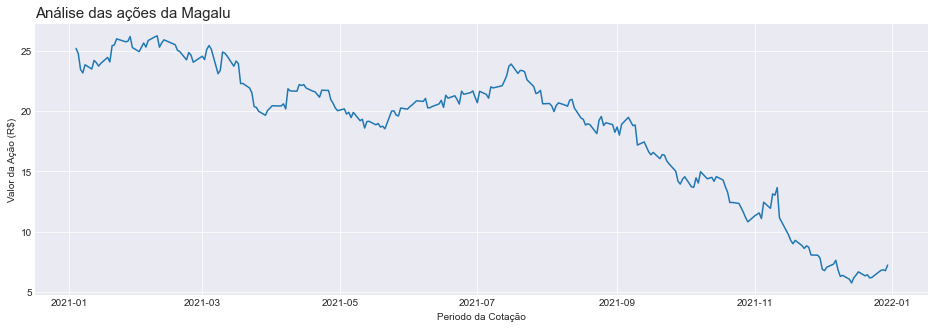

In [12]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(16,5))
plt.title("Análise de ações da Magalu", fontsize=15, loc='left')
plt.plot(tabela.index, tabela['Fechamento'])

plt.xlabel('Periodo da Cotação')
plt.ylabel('Valor da Ação (R$)');


In [13]:
# Verifica os últimos dados
dados.tail()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
242,2021-12-23,6.34,5.99,6.22,6.20,97106100,6.20
243,2021-12-27,6.78,6.23,6.23,6.78,124279800,6.78
244,2021-12-28,6.96,6.64,6.79,6.83,165573900,6.83
245,2021-12-29,6.90,6.70,6.84,6.76,79247400,6.76
246,2021-12-30,7.41,6.77,6.80,7.22,180329400,7.22


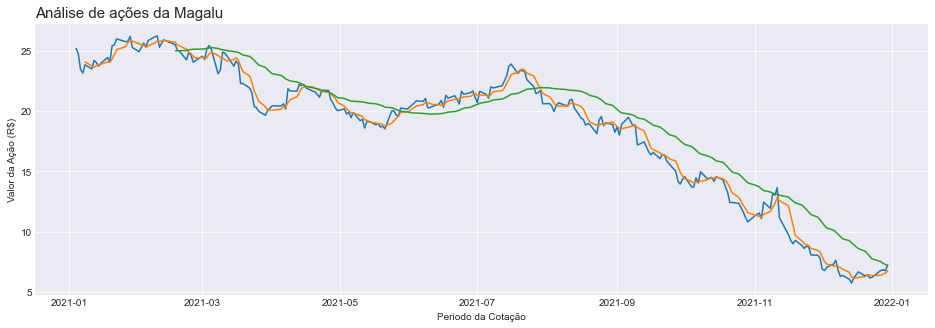

In [14]:
# média móvel e média de tendência
media_movel = dados['Fechamento'].rolling(5).mean()
media_Tendência = dados['Fechamento'].rolling(30).mean()

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(16,5))
plt.title("Análise de ações da Magalu", fontsize=15, loc='left')

plt.plot(tabela.index, tabela['Fechamento'])
plt.plot(tabela.index, media_movel)
plt.plot(tabela.index, media_Tendência)

plt.xlabel('Periodo da Cotação')
plt.ylabel('Valor da Ação (R$)');

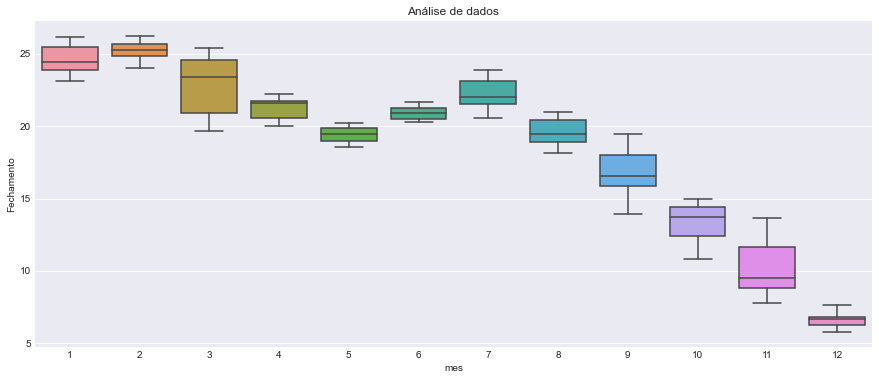

In [15]:
# Criar um gráfico boxplot com análise por mês

dados['mes'] = dados['Data'].dt.month

plt.figure(figsize=(15,6))
plt.title("Análise de dados")

sns.boxplot(data=dados, x='mes', y='Fechamento');